<a href="https://colab.research.google.com/github/ileanacoletta/PF_Ileana_Coletta/blob/main/PF_2_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final Data Science - Segunda Entrega
##"Conjunto de datos sobre la vivienda en Miami"
###Profesor: Jorge Ruiz
###Tutora: Ana Sendon
###Alumna: Ileana Coletta
###Comisión: 61720

#**Abstract**#
Este proyecto tiene como objetivo doble: realizar un análisis exploratorio de un conjunto de datos sobre viviendas en Miami y desarrollar un modelo predictivo de precios.

El conjunto de datos, que abarca 13,932 transacciones, incluye información detallada sobre las características de las propiedades y su entorno. A través de este análisis, se busca comprender los factores que determinan el valor de las viviendas en Miami y construir un modelo capaz de estimar los precios de venta con precisión. Los resultados de este estudio pueden ser de gran utilidad para agentes inmobiliarios, inversores y urbanistas.

#**Marco del Problema**
El contexto analítico de este estudio se centra en el mercado inmobiliario de Miami, un sector altamente dinámico y complejo influenciado por una variedad de factores económicos, demográficos y geográficos.

El problema comercial subyacente radica en la necesidad de desarrollar herramientas y modelos que permitan a agentes inmobiliarios, inversores y tomadores de decisiones comprender mejor los determinantes de los precios de las viviendas en esta región.

Al identificar los factores que más influyen en el valor de las propiedades, se pueden desarrollar estrategias de inversión más efectivas, optimizar los procesos de valoración y brindar a los compradores y vendedores una mejor comprensión del mercado.



#**Fuente**
El dataset escogido fue encontrado en Kaggle y puede ser ubicado a través del siguiente [enlace](https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset/data).


# Obtencion de los datos

In [1]:
""" importar librerias:
panda
numpy
matplotlib
seaborn
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importar csv
#metodo panda pd.read_csv
df= pd.read_csv("https://raw.githubusercontent.com/ileanacoletta/PF_Ileana_Coletta/refs/heads/main/miami-housing.csv")
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


#Definicion de variables#

El conjunto de datos contiene información sobre **13,932 viviendas familiares** vendidas en Miami.

El conjunto de datos contiene las siguientes columnas:

1. PARCELNO: identificador único de cada propiedad.
2. SALE_PRC: precio de venta (USD)
3. LND_SQFOOT: área del terreno (SQF)
4. TOT_LVG_AREA: área del piso (SQF)
5. SPEC_FEAT_VAL: valor de las características especiales
6. RAIL_DIST: distancia a la línea ferroviaria más cercana como un indicador de ruido (pies)
7. OCEAN_DIST: distancia al océano (pies)
8. WATER_DIST: distancia al cuerpo de agua más cercano (pies)
9. CNTR_DIST: distancia al distrito comercial central de Miami (pies)
10. SUBCNTR_DI: distancia al subcentro más cercano (pies)
11. HWY_DIST: distancia a la autopista más cercana (un indicador de ruido) (pies)
12. edad: edad de la estructura
13. avno60plus: variable ficticia para el ruido de los aviones que excede un nivel aceptable
14. structure_quality: calidad de la estructura
15. month_sold: mes de venta en 2016 (1 = ene)
16. LATITUD
17. LONGITUD

Fuente: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

#**Preguntas e Hipotesis de Interes**

Hipotesis 1: ¿La proximidad a cuerpos de agua impacta el valor de la propiedad?

Hipótesis 2: ¿La edad de una propiedad influye en su precio de venta?

Hipótesis 3: ¿La presencia de características específicas (como piscinas, garajes amplios, vistas panorámicas), que no están directamente relacionadas con su tamaño o ubicación, impactan el valor de la propiedad?

# Informacion del Dataset

In [3]:
#metodo LEN - total de elementos (filas/registros) que tenemos
len(df)

13932

In [4]:
#age.count  cuenta cosas que no son nulas
df.age.count()

13932

In [5]:
#informacion de todas las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [6]:
#verificar valores nulos
print("\nValores nulos en el conjunto de datos:")
print(df.isnull().sum())


Valores nulos en el conjunto de datos:
LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64


En esta primera etapa, se puede apreciar que no se encuentran valores faltantes.

In [7]:
#metodo UNIQUE - pero para saber cantidad de clases de esa variable
df.PARCELNO.nunique()

13776

In [8]:
cardinalidad = pd.DataFrame({'Cantidad' :df.nunique(), 'Porcentaje' :(df.nunique())/(df.shape[0]*(100))})
cardinalidad

,Cantidad,Porcentaje
LATITUDE,13776,0.009888
LONGITUDE,13776,0.009888
PARCELNO,13776,0.009888
SALE_PRC,2111,0.001515
LND_SQFOOT,4696,0.003371
TOT_LVG_AREA,2978,0.002138
SPEC_FEAT_VAL,7583,0.005443
RAIL_DIST,13235,0.009500
OCEAN_DIST,13617,0.009774
WATER_DIST,13218,0.009488


Las columnas 'avno60plus' (2 valores unicos), 'month_sold'(12 valores unicos), y 'structure_quality' (5 valores unicos) tienen una cardinalidad baja, lo que podria corresponder a variables categoricas.

In [9]:
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas.")

Hay 0 filas duplicadas.


#Exploracion del dataset

## Analisis de PARCELNO (identificador unico)

El PARCELNO es un identificador unico y cada valor representa una propiedad distinta.

La mayoria de los valores del PARCELNO aparecen una sola vez; sin embargo, hay algunos valores de PARCELNO que aparecen mas de una vez, especificamente 2 y hasta 3 veces. El objetivo de identificar los registros duplicados en el campo PARCELNO es detectar posibles errores o incosistencias en la base de datos, asi como identificar propiedades que podrían haber sido objeto de multiples transacciones, como inversiones inmobiliaria o transacciones realizadas con fines de remodelación y reventa rápida (fix and flip).

La mejor manera de abordar los duplicados en PARCELNO depende de la naturaleza de los datos y objetivos a analizar.

Alguna de las preguntas y consideraciones a tener son:

1. Que impacto tendra la eliminacion de duplicados en los resultados finales? La decision de como tratar los duplicados dependera del contexto especifico de negocio. Por ejemplo, es un analisis de propiedades inmobiliarias con el fin de inversiones o para compra de vivienda primaria.
2. Hay alguna forma de validar la informacion contenida en los registros duplicados? Debido a eliminar los duplicados puede llevar a la perdida de informacion, debemos considerar no solo el contexto especifico de negocio, sino asegurarnos que los beneficios de limpieza superen los costos.
  

In [10]:
# Obtener la cantidad de registros por cada valor único de PARCELNO
PARCELNO_counts = df.PARCELNO.value_counts()
df.PARCELNO.value_counts()

,count
PARCELNO,
3031150056160,3
131240200610,3
3049101290060,3
3022200023090,3
3049210203360,2
...,...
341300081101,1
341300080670,1
341300080820,1


In [11]:
# Ordenar por PARCELNO y month_sold de forma descendente
df = df.sort_values(['PARCELNO', 'month_sold'], ascending=False)

# Agrupar por PARCELNO y seleccionar la primera fila de cada grupo (el más reciente)
df_sin_duplicados = df.groupby('PARCELNO').first().reset_index()

print(df_sin_duplicados)

            PARCELNO   LATITUDE  LONGITUDE  SALE_PRC  LND_SQFOOT  \
0       102000801020  25.774347 -80.206312  400000.0        5000   
1       102010001090  25.774395 -80.204183  330000.0        5000   
2       131120000340  25.843428 -80.201570  150000.0        5250   
3       131120080400  25.851104 -80.194277  135000.0        3400   
4       131120080620  25.850193 -80.194244  125000.0        3188   
...              ...        ...        ...       ...         ...   
13771  3660170161660  25.560536 -80.353980  210000.0        5548   
13772  3660170162070  25.560134 -80.352283  230000.0        3721   
13773  3660170162080  25.560134 -80.352441  254500.0        3198   
13774  3660170162140  25.560319 -80.352594  225000.0        4580   
13775  3660170162200  25.560733 -80.351997  231500.0        3385   

       TOT_LVG_AREA  SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  \
0              1470              0     3280.1      9548.1       927.2   
1              1901             67   

El dataset 'df' tiene 13932 registros, mientras que el "df_sin_duplicados' tiene 13776; esto implica que en el 'df_sin_duplicados' se han removido 156 PARCELNO duplicados o 1.12%

La eliminación de un 1.12% de los registros debido a duplicados es un porcentaje relativamente pequeño y es probable que tenga un impacto limitado en los resultados del análisis.

In [12]:
#metodo DESCRIBE - metodo de Pandas que genera estadisticas descriptivas del DataFrame
#DataFrame original
df.describe().round(1)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.0,13932.0,1.393200e+04,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0
mean,25.7,-80.3,2.356496e+12,399941.9,8620.9,2058.0,9562.5,8348.5,31691.0,11960.3,68490.3,41115.0,7723.8,30.7,0.0,6.7,3.5
std,0.1,0.1,1.199290e+12,317214.7,6070.1,813.5,13891.0,6178.0,17595.1,11933.0,32008.5,22161.8,6068.9,21.2,0.1,3.3,1.1
min,25.4,-80.5,1.020008e+11,72000.0,1248.0,854.0,0.0,10.5,236.1,0.0,3825.6,1462.8,90.2,0.0,0.0,1.0,1.0
25%,25.6,-80.4,1.079160e+12,235000.0,5400.0,1470.0,810.0,3299.4,18079.4,2675.8,42823.1,23996.2,2998.1,14.0,0.0,4.0,2.0
50%,25.7,-80.3,3.040300e+12,310000.0,7500.0,1877.5,2765.5,7106.3,28541.8,6922.6,65852.4,41109.9,6159.8,26.0,0.0,7.0,4.0
75%,25.9,-80.3,3.060170e+12,428000.0,9126.2,2471.0,12352.2,12102.6,44310.6,19200.0,89358.3,53949.4,10854.2,46.0,0.0,9.0,4.0
max,26.0,-80.1,3.660170e+12,2650000.0,57064.0,6287.0,175020.0,29621.5,75744.9,50399.8,159976.5,110553.8,48167.3,96.0,1.0,12.0,5.0


In [13]:
#DataFrame sin duplicados
df_sin_duplicados.describe().round(1)

,PARCELNO,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,1.377600e+04,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0,13776.0
mean,2.357748e+12,25.7,-80.3,401450.7,8624.0,2061.5,9604.8,8354.8,31711.0,11994.2,68625.8,41150.0,7731.2,30.6,0.0,6.7,3.5
std,1.198670e+12,0.1,0.1,317720.8,6063.5,814.4,13923.5,6175.6,17609.8,11941.1,31990.8,22167.8,6074.8,21.1,0.1,3.3,1.1
min,1.020008e+11,25.4,-80.5,72000.0,1248.0,854.0,0.0,10.5,236.1,0.0,3825.6,1462.8,90.2,0.0,0.0,1.0,1.0
25%,1.079160e+12,25.6,-80.4,235000.0,5400.0,1472.0,823.5,3300.0,18080.1,2681.8,42955.2,24043.0,3000.5,14.0,0.0,4.0,2.0
50%,3.040305e+12,25.7,-80.3,312000.0,7500.0,1881.0,2784.0,7125.0,28595.6,6980.0,66039.8,41156.4,6158.8,26.0,0.0,7.0,4.0
75%,3.060180e+12,25.9,-80.3,430000.0,9144.2,2474.2,12655.8,12108.8,44358.3,19265.9,89542.6,53973.9,10873.6,46.0,0.0,9.0,4.0
max,3.660170e+12,26.0,-80.1,2650000.0,57064.0,6287.0,175020.0,29621.5,75744.9,50399.8,159976.5,110553.8,48167.3,96.0,1.0,12.0,5.0


Los resultados del método describe() proporcionan una primera visión general de los datos.

En general, las medidas estadísticas son similares entre ambos DataFrames, lo que sugiere que la eliminación de duplicados no ha alterado significativamente la distribución de los datos.

Sin embargo, para obtener una compresion mas completa de los datos y realizar inferencias mas precisas, seria necesario un análisis más detallado, incluyendo visualizaciones y pruebas estadisticas.

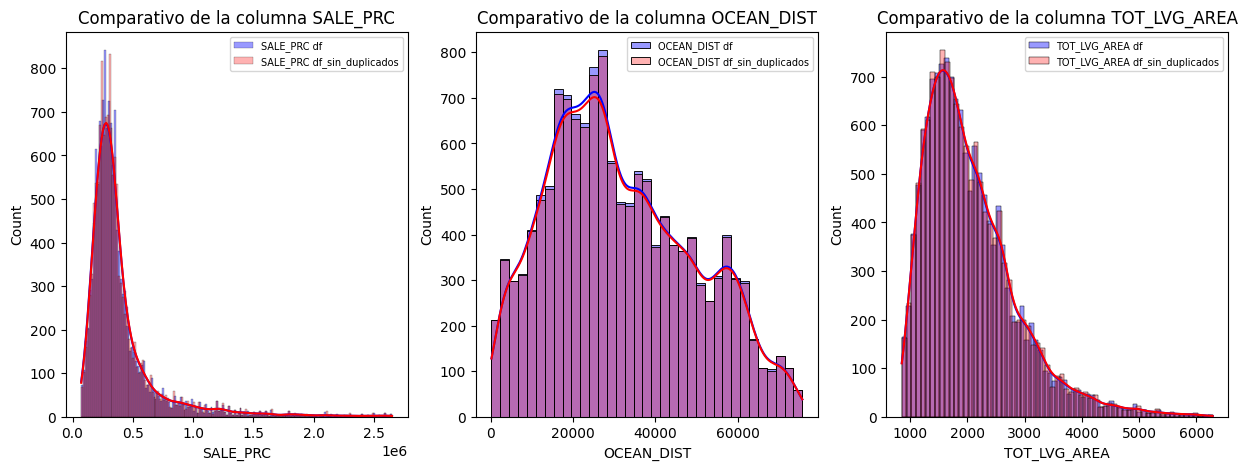

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [14]:
# Crear una figura con tres subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Ajustamos el tamaño para 3 subplots

# Histograma comparativo de la columna 'SALE_PRC'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SALE_PRC', color='blue', label='SALE_PRC df', kde=True, alpha=0.4, ax=axes[0])
sns.histplot(data=df_sin_duplicados, x='SALE_PRC', color='red', label='SALE_PRC df_sin_duplicados', kde=True, alpha=0.3, ax=axes[0])
axes[0].set_title('Comparativo de la columna SALE_PRC')
axes[0].legend()

# Histograma comparativo de la columna 'OCEAN_DIST'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='OCEAN_DIST', color='blue', label='OCEAN_DIST df', kde=True, alpha=0.4, ax=axes[1])
sns.histplot(data=df_sin_duplicados, x='OCEAN_DIST', color='red', label='OCEAN_DIST df_sin_duplicados', kde=True, alpha=0.3, ax=axes[1])
axes[1].set_title('Comparativo de la columna OCEAN_DIST')
axes[1].legend()

# Histograma comparativo de la columna 'TOT_LVG_AREA'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TOT_LVG_AREA', color='blue', label='TOT_LVG_AREA df', kde=True, alpha=0.4, ax=axes[2])
sns.histplot(data=df_sin_duplicados, x='TOT_LVG_AREA', color='red', label='TOT_LVG_AREA df_sin_duplicados', kde=True, alpha=0.3, ax=axes[2])
axes[2].set_title('Comparativo de la columna TOT_LVG_AREA')
axes[2].legend()

# Coloca la leyenda en la esquina superior derecha, cambiar tamano de letra
axes[0].legend(loc='upper right', fontsize=7)
axes[1].legend(loc='upper right', fontsize=7)
axes[2].legend(loc='upper right', fontsize=7)

plt.tight_layout()
plt.show()

Al analizar los histogramas comparativos de las columna 'SALE_PRC', 'OCEAN_DIST', y 'TOTAL_LVG_AREA' podemos apreciar las siguientes observaciones:

1. 'SALE_PRC'

* Forma similar de las distribuciones: Ambas distribuciones parecen seguir una forma similar, con una asimetría positiva (cola a la derecha).
* Diferencias en la frecuencia: La distribución del DataFrame sin duplicados tiende a tener una frecuencia ligeramente menor en la mayoría de los intervalos, especialmente en la parte superior del rango. Esto indica que al eliminar los duplicados, se han eliminado algunos de los valores más altos de 'SALE_PRC'.

2. 'OCEAN_DIST'

* Forma similar de las distribuciones: Ambas distribuciones presentan una forma similar, con una ligera asimetría positiva.
* Mismo patrón general: A pesar de las diferencias en frecuencia, el patrón general de la distribución se mantiene similar en ambos casos. Esto sugiere que la eliminación de los duplicados no ha alterado significativamente la distribución general de las distancias al océano.



3. 'TOTAL_LVG_AREA'
* La eliminación de duplicados no ha sesgado significativamente la distribución del área total de vivienda.
* El patrón general de la distribución se mantiene consistente.


###Conclusiones:

El histograma comparativo de la columna 'SALE_PRC' sugiere que la eliminación de los duplicados ha tenido un **impacto minimo** en la distribución general de los precios de venta. Esto indica que la presencia de duplicados en PARCELNO no alteró de manera significativa la forma general de la distribución de los precios.

El histograma comparativo de la columna 'OCEAN_DIST' sugiere que la eliminación de los duplicados tuvo un **impacto casi nulo** en la distribucion de la variable 'OCEAN_DIST'. Esto sugiere que los duplicados en PARCELNO no introdujeron sesgos o distorsiones relevantes en el análisis de la variable.

El histograma comparativo de la columna 'TOTAL_LVG_AREA' muestra que la eliminación de los duplicados **no ha modificado de manera sustancial** la distribución de las áreas de las propiedades. Esto indica que la presencia de duplicados en PARCELNO no afecto significativamente los resultados de los analisis.

##Identificacion de variables relevantes

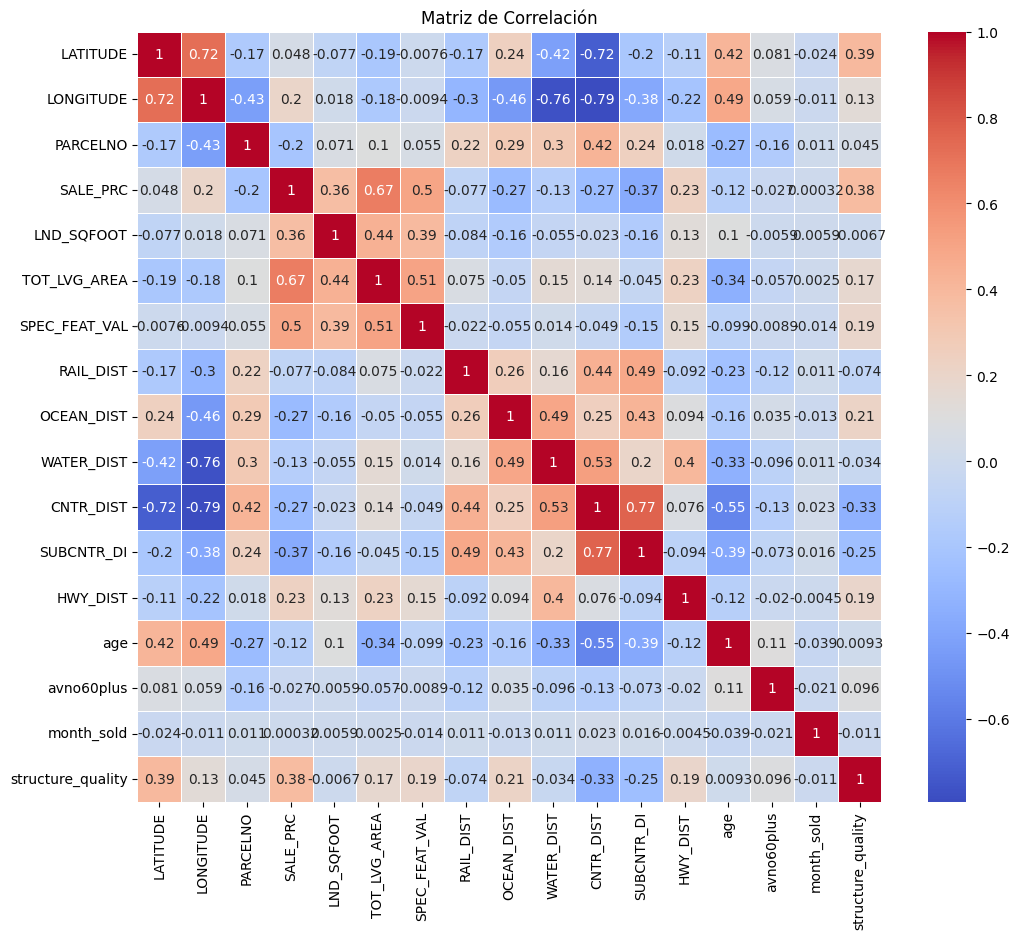

In [15]:
# @title Correlacion entre Variables Numericas

df_numerica = df.select_dtypes(include=['number'])
corr_matrix = df_numerica.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


En base a este mapa de correlación, podemos concluir que los factores mas determinantes del precio de las propiedades en este dataset son:
1. TOT_LVG_AREA: Presenta una correlacion muy fuerte y positiva con el precio de 0.67  
2. SPEC_FEAT_VAL: Tiene una correlacion positiva moderada con el precio, de 0.50
3. structure quality: Tiene una correlacion positiva moderada con el precio, de 0.38
4. LND_SQTFOOT: Tiene una correlacion positiva moderada con el precio, de 0.36

#Análisis Inicial del Conjunto de Datos

En una primera inspección del conjunto de datos, se observa que la información recopilada sobre las 13,932 propiedades en Miami presenta una alta integridad, dado que no se registran valores faltantes en ninguna de las variables.

Al analizar la distribución de las variables numéricas, como el precio de venta y las distintas dimensiones de las propiedades, se aprecian rangos amplios que reflejan la diversidad del mercado inmobiliario de Miami. Por ejemplo, el precio de venta varía significativamente, con un mínimo de 72,000 USD y un máximo de 2,650,000 USD, lo que sugiere una amplia gama de propiedades, desde viviendas más económicas hasta mansiones de lujo.

La distribución de las propiedades en función de su antigüedad muestra una tendencia interesante: la mediana de la edad de las construcciones es de 26 años. Esto indica que una parte considerable del parque inmobiliario de Miami está compuesto por propiedades relativamente nuevas. Sin embargo, también se encuentran propiedades con una antigüedad considerable, lo que sugiere una mezcla de construcciones de diferentes épocas.

# Exploracion del dataset

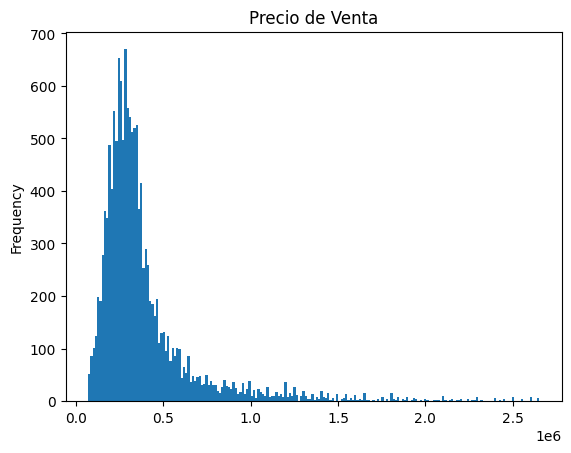

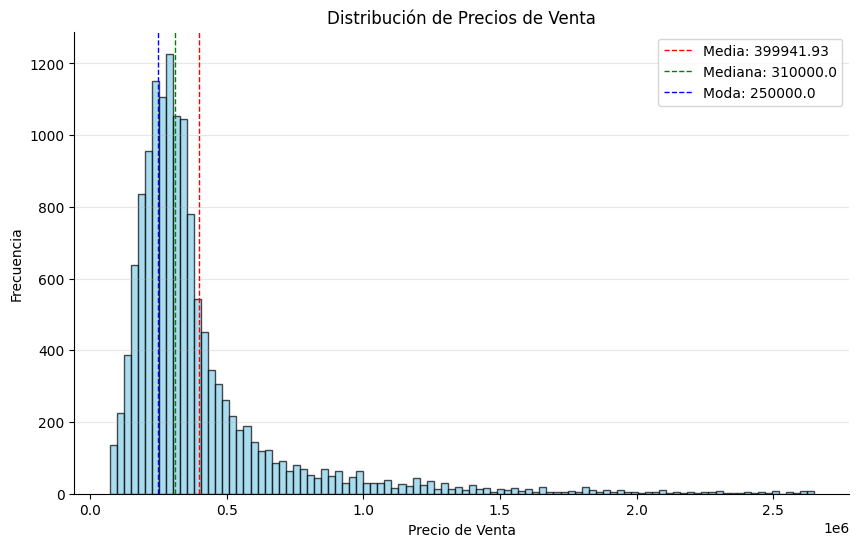

In [16]:
# @title SALE_PRC

df['SALE_PRC'].plot(kind='hist', bins=200, title='Precio de Venta')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['SALE_PRC'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_SALE_PRC = df['SALE_PRC'].mean()
median_SALE_PRC = df['SALE_PRC'].median()
mode_SALE_PRC = df['SALE_PRC'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_SALE_PRC, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_SALE_PRC:.2f}')
plt.axvline(median_SALE_PRC, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_SALE_PRC}')
plt.axvline(mode_SALE_PRC, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_SALE_PRC}')

plt.legend()
plt.show()


plt.show()

<font color='red'> Si sale_price y ocean_distance son variables continuas, puede resultarte útil hacer un scatterplot para investigar la relación entre ambas:

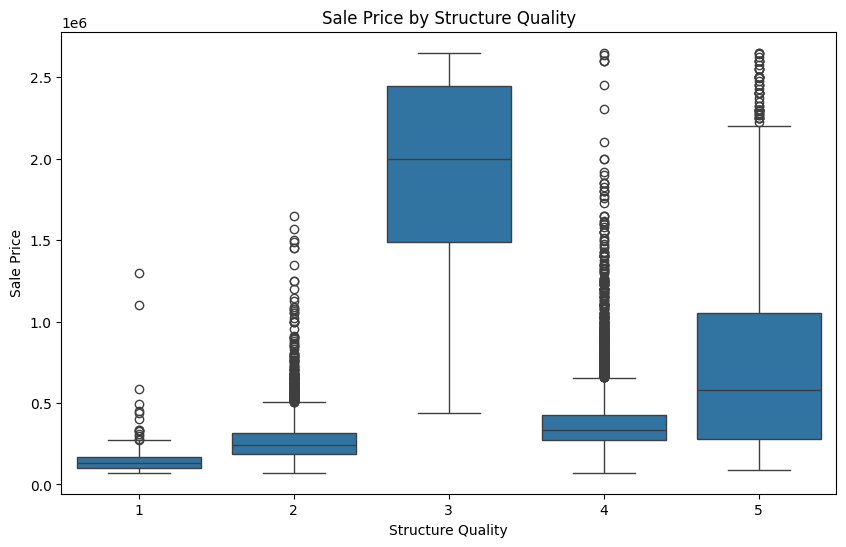

In [17]:
# @title Sale Price by Structure Quality

plt.figure(figsize=(10, 6))
sns.boxplot(x='structure_quality', y='SALE_PRC', data=df)
plt.title('Sale Price by Structure Quality')
plt.xlabel('Structure Quality')
_ = plt.ylabel('Sale Price')

El boxplot confirma la tendencia observada en el mapa de calor que es que la calidad de la estructura es un factor importante que influye en el precio de venta de una propiedad, pero no es el único.

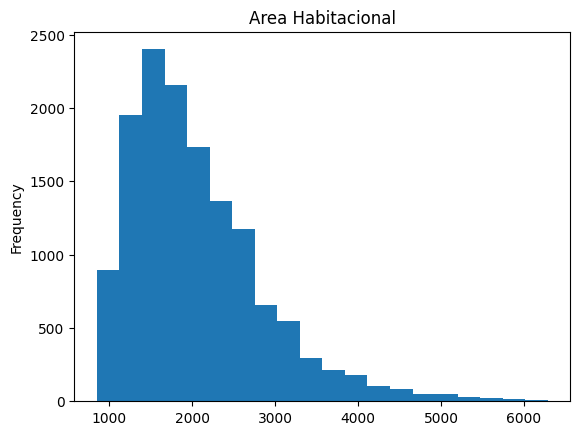

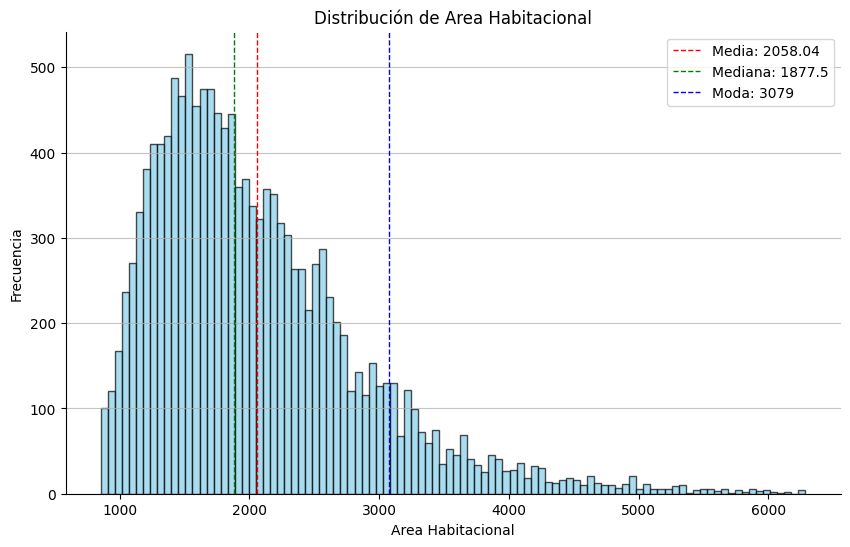

In [18]:
# @title TOT_LVG_AREA

df['TOT_LVG_AREA'].plot(kind='hist', bins=20, title='Area Habitacional')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['TOT_LVG_AREA'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Area Habitacional')
plt.ylabel('Frecuencia')
plt.title('Distribución de Area Habitacional')
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_TOT_LVG_AREA = df['TOT_LVG_AREA'].mean()
median_TOT_LVG_AREA = df['TOT_LVG_AREA'].median()
mode_TOT_LVG_AREA = df['TOT_LVG_AREA'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_TOT_LVG_AREA, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_TOT_LVG_AREA:.2f}')
plt.axvline(median_TOT_LVG_AREA, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_TOT_LVG_AREA}')
plt.axvline(mode_TOT_LVG_AREA, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_TOT_LVG_AREA}')

plt.legend()
plt.show()

Podemos apreciar asimetria a la derecha. La media es mayor a la mediana.

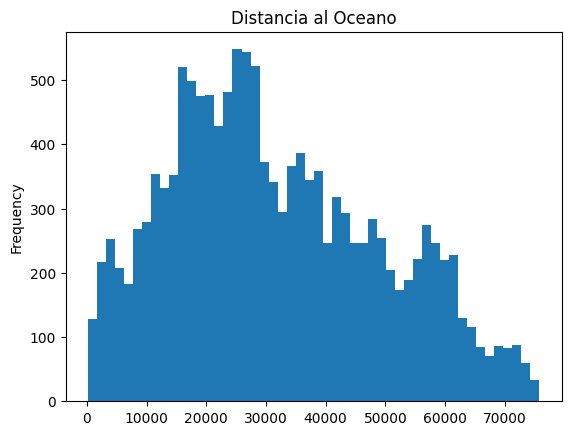

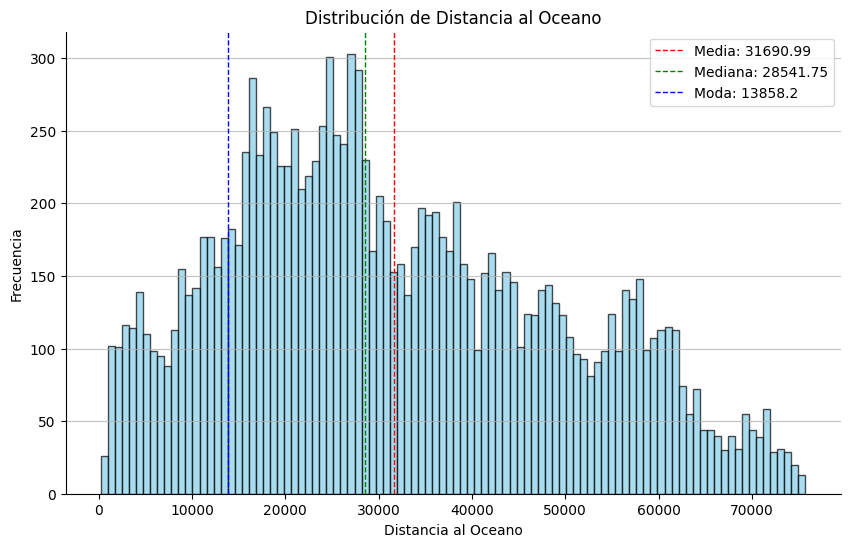

In [19]:
# @title OCEAN_DIST

df['OCEAN_DIST'].plot(kind='hist', bins=50, title='Distancia al Oceano')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['OCEAN_DIST'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distancia al Oceano')
plt.ylabel('Frecuencia')
plt.title('Distribución de Distancia al Oceano')
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Se calcula la media, mediana y moda
mean_OCEAN_DIST = df['OCEAN_DIST'].mean()
median_OCEAN_DIST = df['OCEAN_DIST'].median()
mode_OCEAN_DIST = df['OCEAN_DIST'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_OCEAN_DIST, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_OCEAN_DIST:.2f}')
plt.axvline(median_OCEAN_DIST, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_OCEAN_DIST}')
plt.axvline(mode_OCEAN_DIST, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_OCEAN_DIST}')

plt.legend()
plt.show()

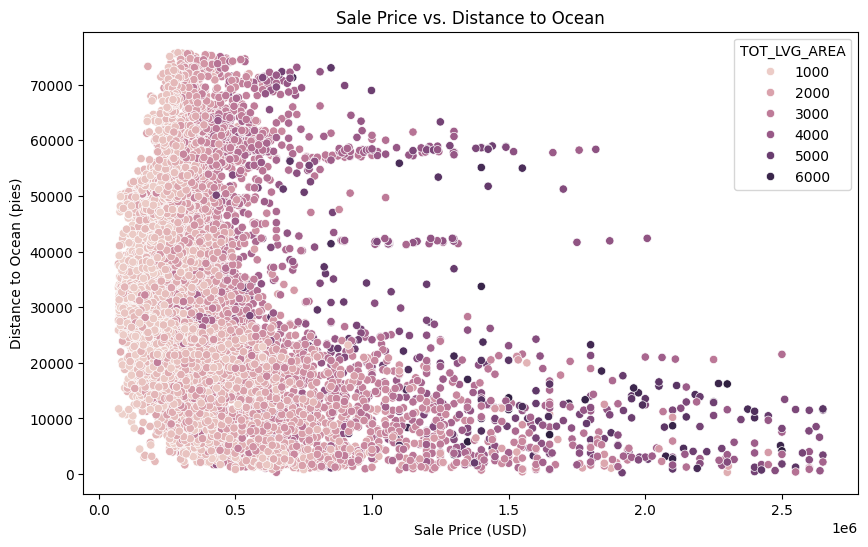

In [20]:
# @title Distribución de la Distancia al Océano por Rango de Precio

plt.figure(figsize=(10, 6))
sns.scatterplot(y='OCEAN_DIST', x='SALE_PRC', hue='TOT_LVG_AREA', data=df)
plt.ylabel('Distance to Ocean (pies)')
plt.xlabel('Sale Price (USD)')
plt.title('Sale Price vs. Distance to Ocean')
plt.show()

Observaciones:

El gráfico muestra que las propiedades más cercanas al mar suelen ser más caras. Esto se debe a que la ubicación costera es muy valorada por los compradores. Sin embargo,  es importante destacar que esta relación no es perfecta y hay otros factores como el tamaño de la vivienda y las características de la zona que también influyen en el precio final.

En resumen y de manera simplista, el gráfico nos revela una clara tendencia: las propiedades más cercanas al mar suelen ser más costosas.

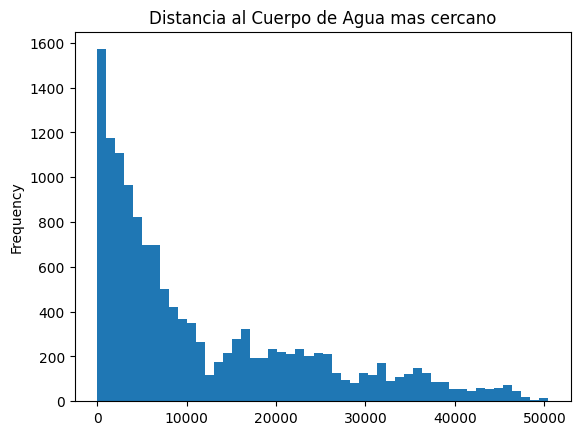

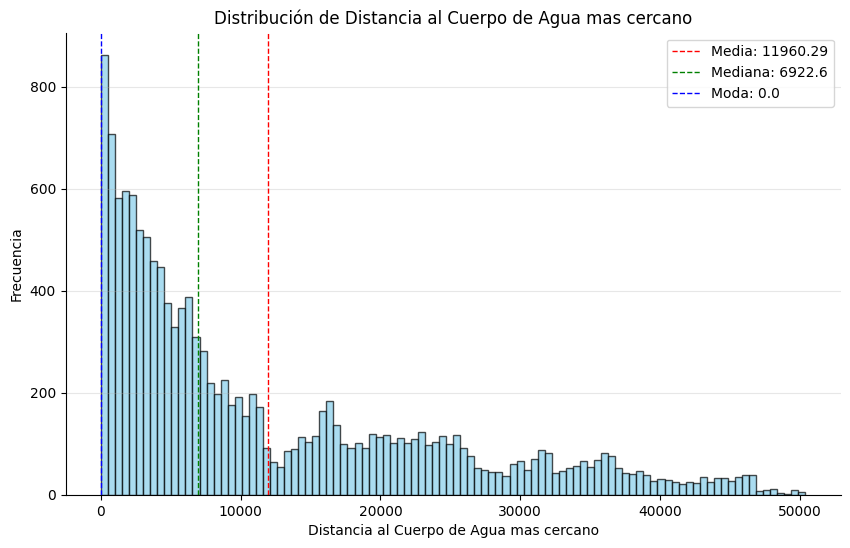

In [21]:
# @title WATER_DIST

df['WATER_DIST'].plot(kind='hist', bins=50, title='Distancia al Cuerpo de Agua mas cercano')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['WATER_DIST'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distancia al Cuerpo de Agua mas cercano')
plt.ylabel('Frecuencia')
plt.title('Distribución de Distancia al Cuerpo de Agua mas cercano')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Se calcula la media, mediana y moda
mean_WATER_DIST = df['WATER_DIST'].mean()
median_WATER_DIST = df['WATER_DIST'].median()
mode_WATER_DIST = df['WATER_DIST'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_WATER_DIST, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_WATER_DIST:.2f}')
plt.axvline(median_WATER_DIST, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_WATER_DIST}')
plt.axvline(mode_WATER_DIST, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_WATER_DIST}')

plt.legend()
plt.show()

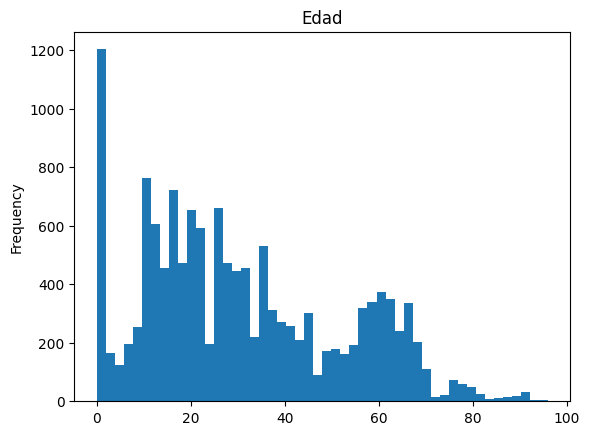

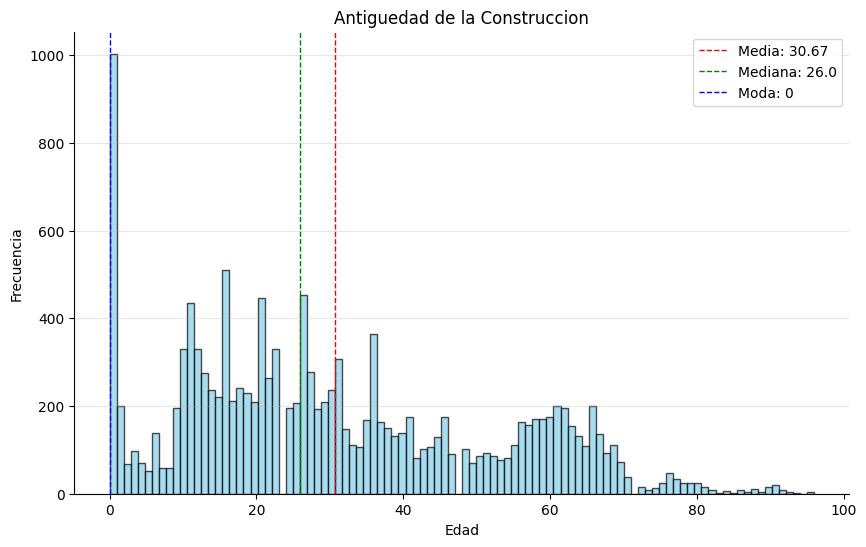

In [22]:
# @title age

df['age'].plot(kind='hist', bins=50, title='Edad')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Antiguedad de la Construccion')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_age}')
plt.axvline(mode_age, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_age}')

plt.legend()
plt.show()

 <font color='red'> Tenés muchas propiedades con una edad de 0. ¿Se trata de propiedades con menos de un año, de errores o de propiedades para las cuales no hay información, es decir, valores perdidos? En la fuente del dataset puede haber pistas sobre esto:

In [26]:
df[df['age'] == 0].shape

(1003, 17)

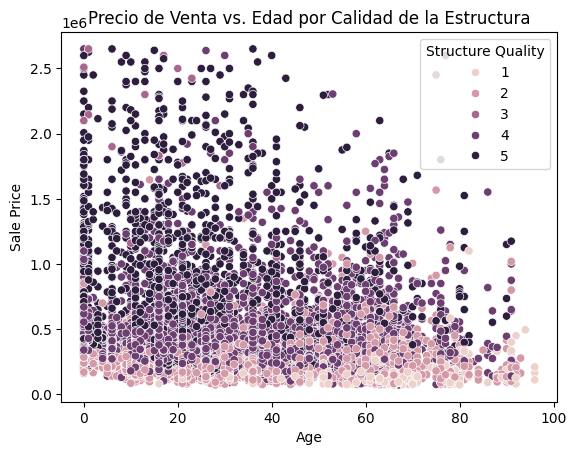

In [23]:
# Crear un  scatterplot
sns.scatterplot(x='age', y='SALE_PRC', hue='structure_quality', data=df)

# Personalizar el scatterplot
plt.title('Precio de Venta vs. Edad por Calidad de la Estructura')
plt.xlabel('Age')
plt.ylabel('Sale Price')
plt.legend(title='Structure Quality')

plt.show()

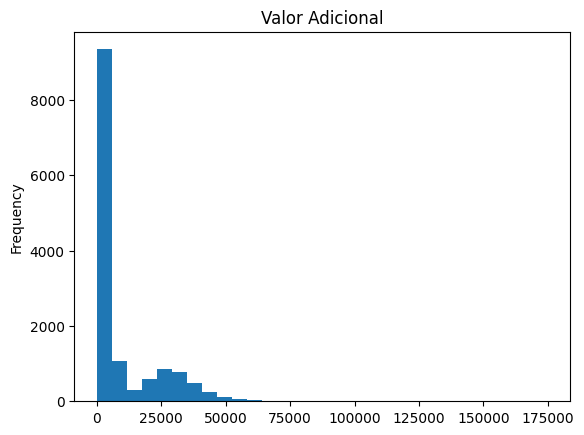

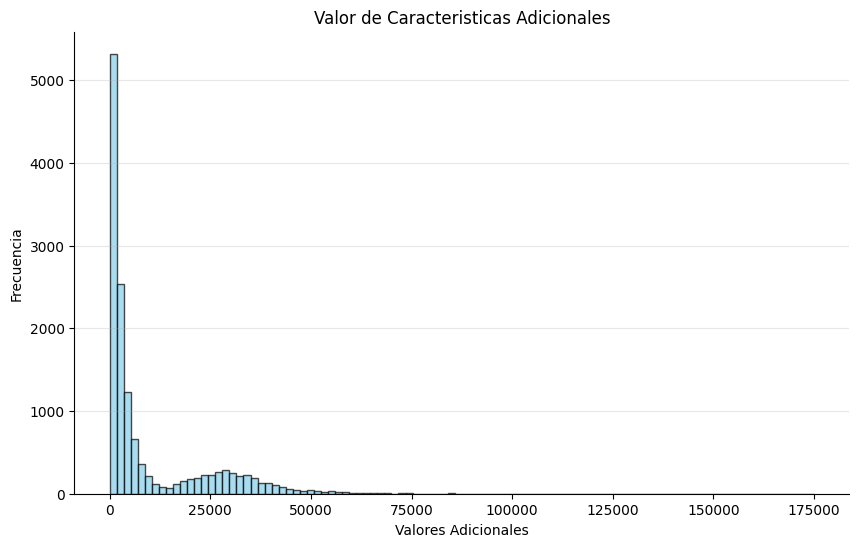

In [24]:
# @title SPEC_FEAT_VAL

df['SPEC_FEAT_VAL'].plot(kind='hist', bins=30, title='Valor Adicional')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['SPEC_FEAT_VAL'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Valores Adicionales')
plt.ylabel('Frecuencia')
plt.title('Valor de Caracteristicas Adicionales')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [25]:
# calcular el coeficiente de variacion para cada columna
# SALE_PRC	LND_SQFOOT	TOT_LVG_AREA	SPEC_FEAT_VAL	RAIL_DIST	OCEAN_DIST	WATER_DIST	CNTR_DIST	SUBCNTR_DI	HWY_DIST	age	avno60plus	month_sold	structure_quality
coef_var_SALE_PRC = (df['SALE_PRC'].std() / df['SALE_PRC'].mean())*100
coef_var_LND_SQFOOT = (df['LND_SQFOOT'].std() / df['LND_SQFOOT'].mean())*100
coef_var_TOT_LVG_AREA = (df['TOT_LVG_AREA'].std() / df['TOT_LVG_AREA'].mean())*100
coef_var_SPEC_FEAT_VAL = (df['SPEC_FEAT_VAL'].std() / df['SPEC_FEAT_VAL'].mean())*100
coef_var_RAIL_DIST = (df['RAIL_DIST'].std() / df['RAIL_DIST'].mean())*100
coef_var_OCEAN_DIST = (df['OCEAN_DIST'].std() / df['OCEAN_DIST'].mean())*100
coef_var_WATER_DIST = (df['WATER_DIST'].std() / df['WATER_DIST'].mean())*100
coef_var_CNTR_DIST = (df['CNTR_DIST'].std() / df['CNTR_DIST'].mean())*100
coef_var_SUBCNTR_DI = (df['SUBCNTR_DI'].std() / df['SUBCNTR_DI'].mean())*100
coef_var_HWY_DIST = (df['HWY_DIST'].std() / df['HWY_DIST'].mean())*100
coef_var_age = (df['age'].std() / df['age'].mean())*100
coef_var_structure_quality = (df['structure_quality'].std() / df['structure_quality'].mean())*100


# Función para interpretar el coeficiente de variación
def interpretar_cv(cv):
    if cv <= 30:
        return "Los datos de la muestra son relativamente homogéneos, por lo tanto la media ES representativa"
    elif cv <= 70:
        return "Los datos de la muestra son heterogéneos, por lo tanto la media NO ES representativa"
    else:
        return "Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa"

# imprimir los coeficientes de variacion con su interpretacion
print("Coeficiente de variación de SALE_PRC:", coef_var_SALE_PRC, "-", interpretar_cv(coef_var_SALE_PRC))
print("Coeficiente de variación de LND_SQFOOT:", coef_var_LND_SQFOOT, "-", interpretar_cv(coef_var_LND_SQFOOT))
print("Coeficiente de variación de TOT_LVG_AREA:", coef_var_TOT_LVG_AREA, "-", interpretar_cv(coef_var_TOT_LVG_AREA))
print("Coeficiente de variación de SPEC_FEAT_VAL:", coef_var_SPEC_FEAT_VAL, "-", interpretar_cv(coef_var_SPEC_FEAT_VAL))
print("Coeficiente de variación de RAIL_DIST:", coef_var_RAIL_DIST, "-", interpretar_cv(coef_var_RAIL_DIST))
print("Coeficiente de variación de OCEAN_DIST:", coef_var_OCEAN_DIST, "-", interpretar_cv(coef_var_OCEAN_DIST))
print("Coeficiente de variación de WATER_DIST:", coef_var_WATER_DIST, "-", interpretar_cv(coef_var_WATER_DIST))
print("Coeficiente de variación de CNTR_DIST:", coef_var_CNTR_DIST, "-", interpretar_cv(coef_var_CNTR_DIST))
print("Coeficiente de variación de SUBCNTR_DI:", coef_var_SUBCNTR_DI, "-", interpretar_cv(coef_var_SUBCNTR_DI))
print("Coeficiente de variación de HWY_DIST:", coef_var_HWY_DIST, "-", interpretar_cv(coef_var_HWY_DIST))
print("Coeficiente de variación de age:", coef_var_age, "-", interpretar_cv(coef_var_age))
print("Coeficiente de variación de structure_quality:", coef_var_structure_quality, "-", interpretar_cv(coef_var_structure_quality))
print("Es importante remarcar que entre mas heterogenea es mi muestra, menos representativa es la media")

Coeficiente de variación de SALE_PRC: 79.31518519105579 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de LND_SQFOOT: 70.41147540062512 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de TOT_LVG_AREA: 39.52968490060975 - Los datos de la muestra son heterogéneos, por lo tanto la media NO ES representativa
Coeficiente de variación de SPEC_FEAT_VAL: 145.26512177914162 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de RAIL_DIST: 74.0012131887474 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de OCEAN_DIST: 55.52075640077771 - Los datos de la muestra son heterogéneos, por lo tanto la media NO ES representativa
Coeficiente de variación de WATER_DIST: 99.77180422093028 - Los dato

#**Hipotesis**
Estas hipótesis buscan establecer una relación entre ciertas variables (distancia al agua, edad, características especiales) y el precio de venta de las propiedades. Al analizar los datos, se podrá determinar si estas relaciones son estadísticamente significativas y si las hipótesis propuestas son correctas.



**Hipotesis 1**: La proximidad a cuerpos de agua impacta el valor de la propiedad.


**Hipótesis 2**: La edad de una propiedad influye en su precio de venta.


**Hipótesis 3**: La presencia de características específicas  (como piscinas, garajes amplios, vistas panorámicas), que no están directamente relacionadas con su tamaño o ubicación, impactan el valor de la propiedad.


Consideraciones:

Hipótesis 1: Proximidad a cuerpos de agua

Al analizar las variables "OCEAN_DIST", "WATER_DIST" y "SALE_PRC", podemos obtener indicios iniciales sobre la relación entre la cercanía a cuerpos de agua y el precio de venta. La distribución de la distancia al océano (OCEAN_DIST) sugiere una concentración de propiedades relativamente cercanas a la costa. Sin embargo, para corroborar si esta proximidad se traduce en un precio más elevado, será necesario realizar un análisis de correlación más profundo y posiblemente un modelo de regresión.

Hipótesis 2: Edad de la propiedad

La variable "age" proporciona información valiosa para evaluar la relación entre la antigüedad de una propiedad y su precio. La mediana de edad de 26 años indica que el mercado inmobiliario de Miami tiene un mix de propiedades de diferentes épocas. Sin embargo, para determinar si la edad es un factor determinante en el precio, se requiere un análisis más detallado, considerando otras variables como la ubicación y las características específicas de cada propiedad.

Hipótesis 3: Características especiales

La variable "SPEC_FEAT_VAL" es un indicador de las características adicionales de una propiedad. El amplio rango de valores en esta variable sugiere una gran diversidad en términos de amenities y acabados. Para evaluar el impacto de estas características en el precio, será necesario analizar su relación con el precio de venta y controlar por otras variables que puedan influir, como el tamaño de la propiedad o la ubicación.


<font color='red'> No está mal tu razonamiento, pero la estructura de hipótesis nula o alternativa se usa en un tipo muy particular de análisis estadístico, que son las regresiones. En ese caso, el rechazo de la hipótesis nula no se da por un criterio establecido por el analista, sino que se da por los valores p, que indican la probabilidad de que el resultado observado (la relación entre las variables) no sea por azar. Esto también se vincula a la probabilidad de que las relaciones que vemos que se dan en nuestra muestra se repliquen en la población. En este curso se da de manera un poco superficial y por encima, por lo que quería dejar en claro esto. Sí podés establecer tu criterio (si al analizar los datos se encuentra que las propiedades ubicadas a menos de 500 metros de la playa tienen un precio promedio 20% más alto que...), pero no se enmarcaría en el procedimiento de rechazo de hipótesis nula. Si en la segunda parte del curso vas a realizar una regresión lineal para predecir el precio, entonces ese análisis mismo te va a dar en qué medida la distancia con respecto a la playa afecta el precio (los coeficientes de regresión dan la proporción del impacto), y con qué confianza podemos afirmar esto (los p valores). No quiero que te enriedes con esto, lo vamos a ver en la segunda parte y en los módulos siguientes con mayor profundidad, pero me pareció importante mencionarlo. Si te queda alguna duda sobre esto podés escribirme y lo vemos, pero de nuevo, es algo un poco más avanzado.


#Identificacion de Outliers

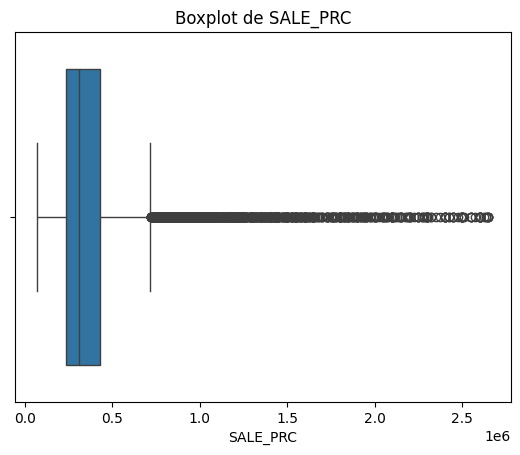

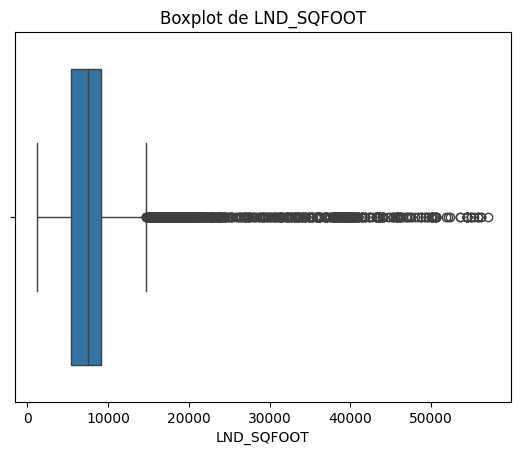

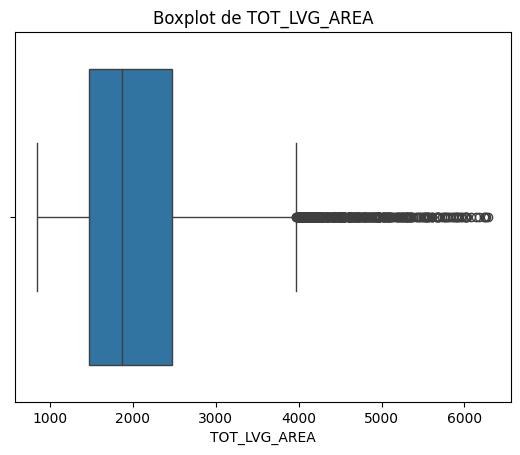

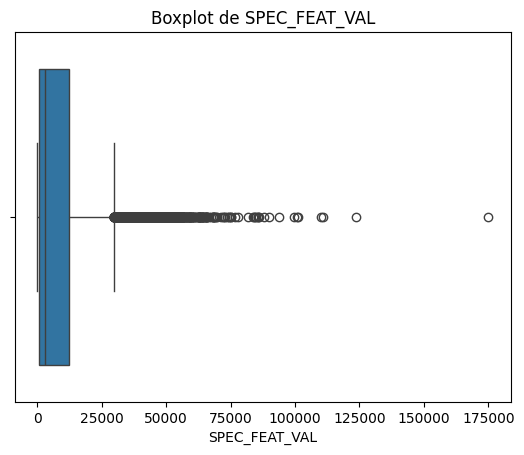

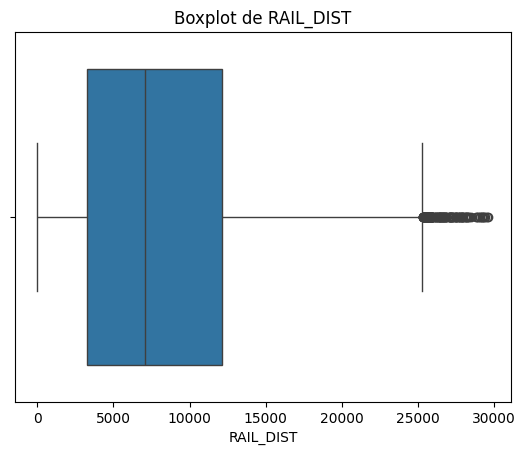

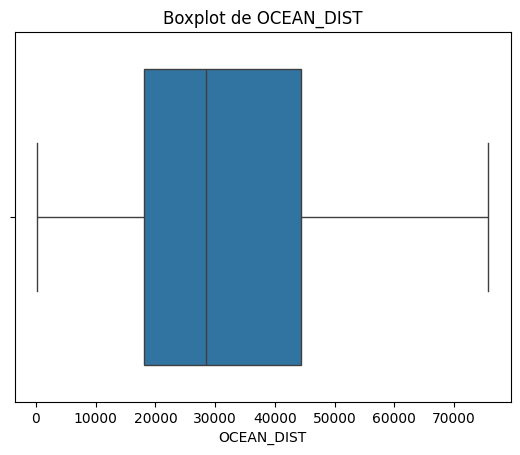

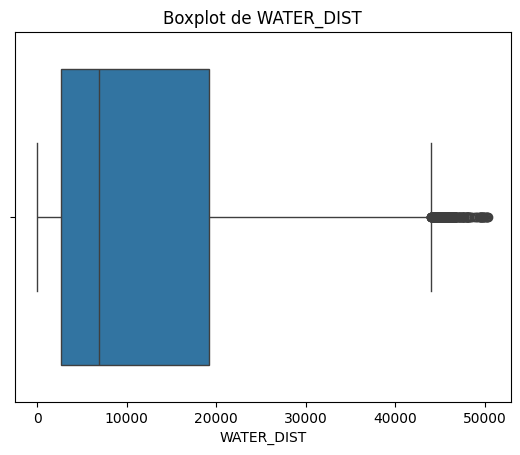

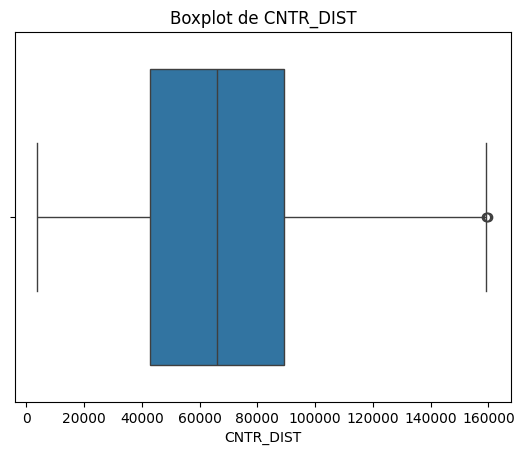

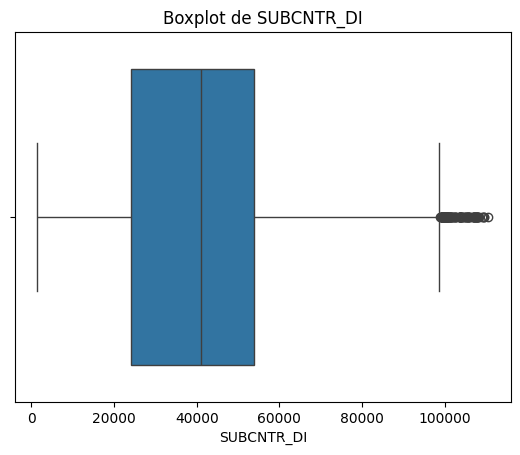

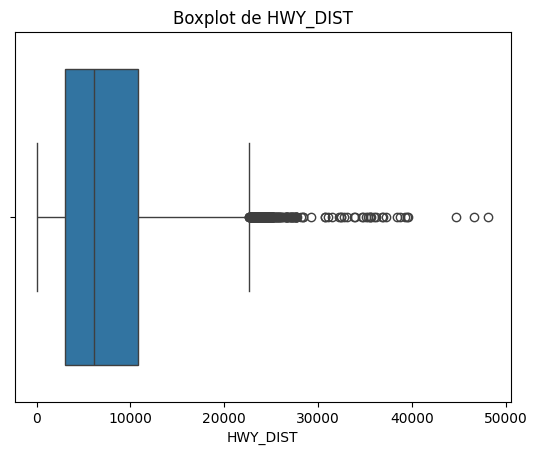

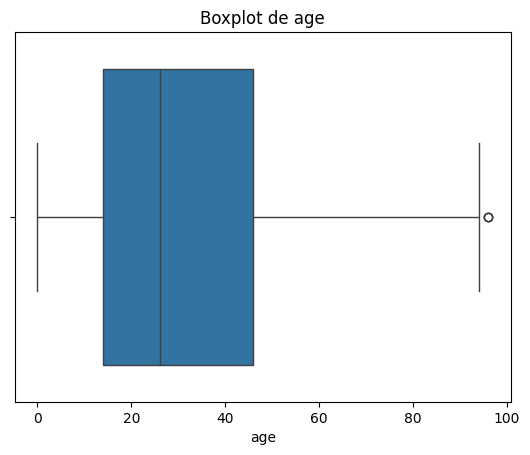

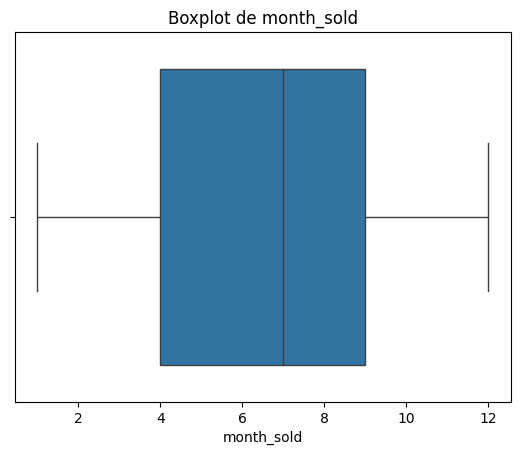

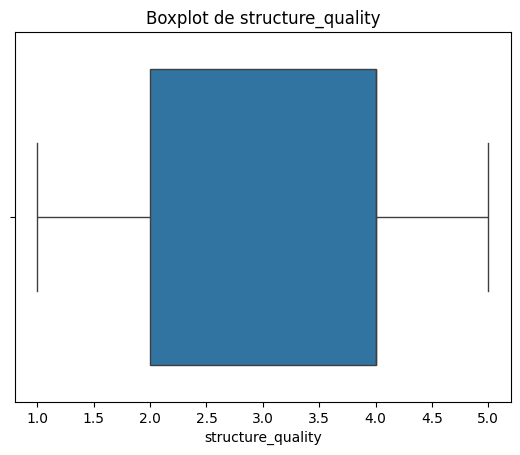

Registros con outliers:
       LATITUDE  LONGITUDE       PARCELNO   SALE_PRC  LND_SQFOOT  \
8838  25.558126 -80.345804  3660160150250   364000.0        5250   
8902  25.562561 -80.334150  3660160130060   307500.0        5000   
8868  25.560494 -80.343940  3660160100030   371000.0        6895   
8955  25.566840 -80.334030  3660160060250   295000.0        6176   
9058  25.574301 -80.329870  3660100230530   362000.0        9269   
...         ...        ...            ...        ...         ...   
2463  25.801045 -80.221186   131260200440   215000.0       19320   
2441  25.803219 -80.197822   131250281290  1566700.0        6900   
2458  25.798672 -80.192978   131250110300  1100000.0        7380   
2335  25.812028 -80.198476   131240210900   912500.0       10000   
2388  25.822523 -80.194545   131240120380   530000.0        5500   

      TOT_LVG_AREA  SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  \
8838          2789          40975    11205.0     10543.6      2541.1   
8902          2

In [26]:
numericas = ['SALE_PRC','LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL','RAIL_DIST','OCEAN_DIST','WATER_DIST','CNTR_DIST','SUBCNTR_DI','HWY_DIST','age','month_sold','structure_quality']

# la variable structure_quality se consideraria una variable numerica o categorica?

for column in numericas:
    sns.boxplot(x=df[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = df[outliers]
print("Registros con outliers:")
print(outlier_rows)

In [27]:
# Contar los outliers
num_outliers = outliers.sum()

print("Número de registros con outliers:", num_outliers)

# Mostrar los registros que contienen outliers
outlier_rows = df[outliers]
print("Registros con outliers:")
print(outlier_rows)

Número de registros con outliers: 3614
Registros con outliers:
       LATITUDE  LONGITUDE       PARCELNO   SALE_PRC  LND_SQFOOT  \
8838  25.558126 -80.345804  3660160150250   364000.0        5250   
8902  25.562561 -80.334150  3660160130060   307500.0        5000   
8868  25.560494 -80.343940  3660160100030   371000.0        6895   
8955  25.566840 -80.334030  3660160060250   295000.0        6176   
9058  25.574301 -80.329870  3660100230530   362000.0        9269   
...         ...        ...            ...        ...         ...   
2463  25.801045 -80.221186   131260200440   215000.0       19320   
2441  25.803219 -80.197822   131250281290  1566700.0        6900   
2458  25.798672 -80.192978   131250110300  1100000.0        7380   
2335  25.812028 -80.198476   131240210900   912500.0       10000   
2388  25.822523 -80.194545   131240120380   530000.0        5500   

      TOT_LVG_AREA  SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  \
8838          2789          40975    11205.0    

In [28]:
# Calcular el IQR y los límites para la variable 'age'
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Identificar los outliers en la variable 'age'
outliers_age = (df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)

# Contar los outliers en la variable 'age'
num_outliers_age = outliers_age.sum()

print("Número de outliers en la variable 'age':", num_outliers_age)

Número de outliers en la variable 'age': 3


 <font color='red'> Perfecto. Recordá que los outliers no son necesariamente datos erróneos. Hay variables que naturalmente tienen distribuciones más atípicas, por ejemplo, salarios, precios.

In [29]:
# Print the rows with outliers in 'age'
print(df[outliers_age])

       LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
3986  25.725790  -80.25046  141210076220  166000.0        5000          1169   
2426  25.801844  -80.22792  131270400031  210000.0        6307          1587   
2425  25.801844  -80.22792  131270400031  111200.0        6307          1587   

      SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
3986              0     2784.2      2993.3      2634.9    26477.1      8999.7   
2426           1378     1421.9     21154.9      3486.8    14711.0     14711.0   
2425           1378     1421.9     21154.9      3486.8    14711.0     14711.0   

      HWY_DIST  age  avno60plus  month_sold  structure_quality  
3986   15365.0   96           0           7                  1  
2426    3719.8   96           0          12                  1  
2425    3719.8   96           0           9                  1  


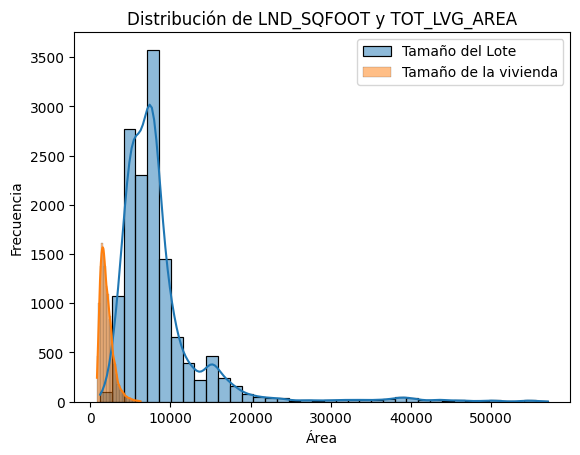

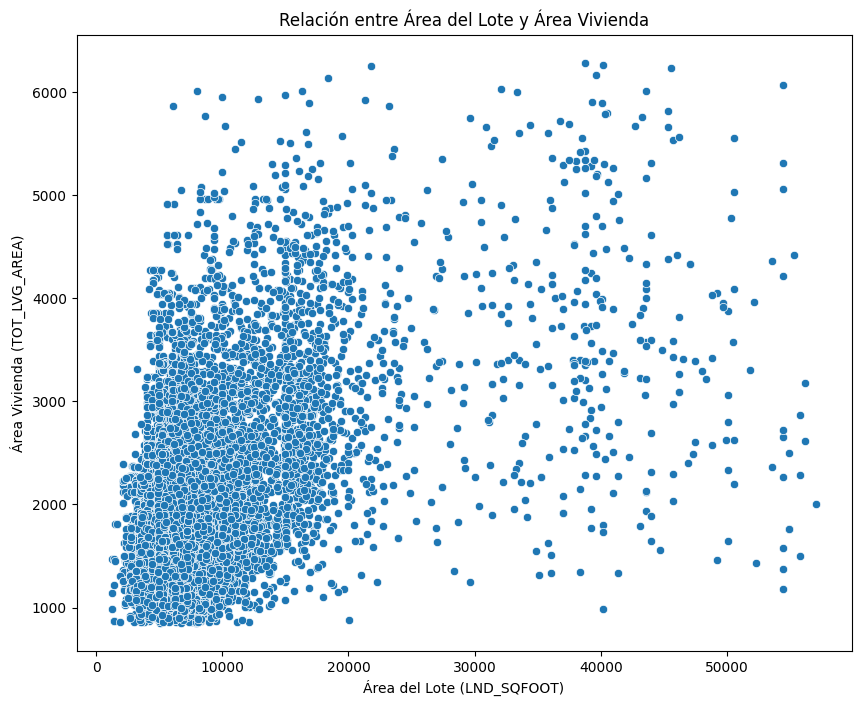

In [30]:
# @title LND_SQFOOT & TOT_LVG_AREA

# Histograma
sns.histplot(data=df, x='LND_SQFOOT', bins=38, kde=True, label='Tamaño del Lote')
sns.histplot(data=df, x='TOT_LVG_AREA', bins=30, kde=True, label='Tamaño de la vivienda')
plt.title('Distribución de LND_SQFOOT y TOT_LVG_AREA')
plt.xlabel('Área')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Diagrama de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='LND_SQFOOT', y='TOT_LVG_AREA')
plt.xlabel('Área del Lote (LND_SQFOOT)')
plt.ylabel('Área Vivienda (TOT_LVG_AREA)')
plt.title('Relación entre Área del Lote y Área Vivienda')
plt.show()

 <font color='red'> Recordá poner toda la información en tus gráficos, por ejemplo, qué está en naranja y qué en azul en el primero.

In [31]:
# Correlación
correlation = df['LND_SQFOOT'].corr(df['TOT_LVG_AREA'])
print("Correlación:", correlation)

# Estadísticas descriptivas
print(df[['LND_SQFOOT', 'TOT_LVG_AREA']].describe())

Correlación: 0.43747246339968726
         LND_SQFOOT  TOT_LVG_AREA
count  13932.000000  13932.000000
mean    8620.879917   2058.044574
std     6070.088742    813.538535
min     1248.000000    854.000000
25%     5400.000000   1470.000000
50%     7500.000000   1877.500000
75%     9126.250000   2471.000000
max    57064.000000   6287.000000


Correlación: El coeficiente de correlación de Pearson es de 0.43747246339968743, lo cual indica una correlación positiva moderada entre el área del lote (LND_SQFOOT) y el área habitable (TOT_LVG_AREA). Esto significa que, en general, a medida que aumenta el tamaño del lote, también tiende a aumentar el tamaño de la vivienda.


Media: El área promedio del lote es de 8620.88 pies cuadrados y el área habitable promedio es de 2058.04 pies cuadrados.

Desviación estándar: La desviación estándar indica la dispersión de los datos alrededor de la media. la desviación estándar tanto de LND_SQFOOT como de TOT_LVG_AREA es considerable. Esto significa que existe una gran variabilidad en los tamaños de los lotes y las viviendas. Hay lotes y casas mucho más grandes y mucho más pequeñas que el promedio. Lo que demuestra que el conjunto de datos es heterogéneo, es decir, no todos los datos son similares; por consiguiente, una alta variabilidad puede dificultar la identificación de patrones y relaciones claras entre las variables.

Mínimo y máximo: Los valores mínimo y máximo nos dan una idea de los rangos de los datos. El lote más pequeño tiene 1248 pies cuadrados y el más grande 57064 pies cuadrados.


<Axes: >

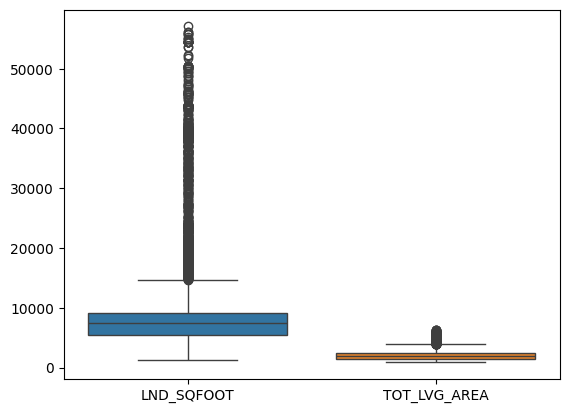

In [36]:
# box plot
sns.boxplot(data=df[['LND_SQFOOT', 'TOT_LVG_AREA']])

 <font color='red'> Ileana, muy bueno tu trabajo. Algunos comentarios:

<font color='red'> Primero, no logré entender los agrupamientos de datos en la primera parte, ¿cuál es la razón? ¿cuál termina siendo tu unidad de análisis, es decir, qué es cada fila? En la segunda parte luego del planteamiento de hipótesis trabajás con el dataset entero, lo cual me parece correcto.

<font color='red'> Segundo, recordá que a veces hay valores perdidos ocultos; por ejemplo, ¿qué pasa en el caso de propiedades con edad de 0?

<font color='red'> El abstract y el marco del problema están muy bien. Efectivamente, el objetivo de un proyecto de Data Science es entrenar un modelo para realizar una predicción o estimación, en este caso, del precio.

 <font color='red'> Por lo tanto, te puede resultar útil enfocar tu análisis en el precio. ¿Cómo se vincula el precio con tus otras variables, hay relaciones fuertes? Por ejemplo entre precio + distancia a océano, precio + distancia a cuerpos de agua, precio + área total, precio +  calidad de la estructura, precio+ distancia a autopista, precio + distancia a circuito comercial. Visualizar estos cruces te puede dar pistas sobre qué variables van a ser más importantes en tu modelo.

<font color='red'> Espero que estos comentarios te sirvan para avanzar en la segunda parte del curso y en el proyecto final.

 <font color='red'> Si te queda alguna duda me escribís y lo vemos!

<ipython-input-31-870485a16105>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='structure_quality', columns='TOT_LVG_AREA_grouped', values='SALE_PRC', aggfunc='mean')


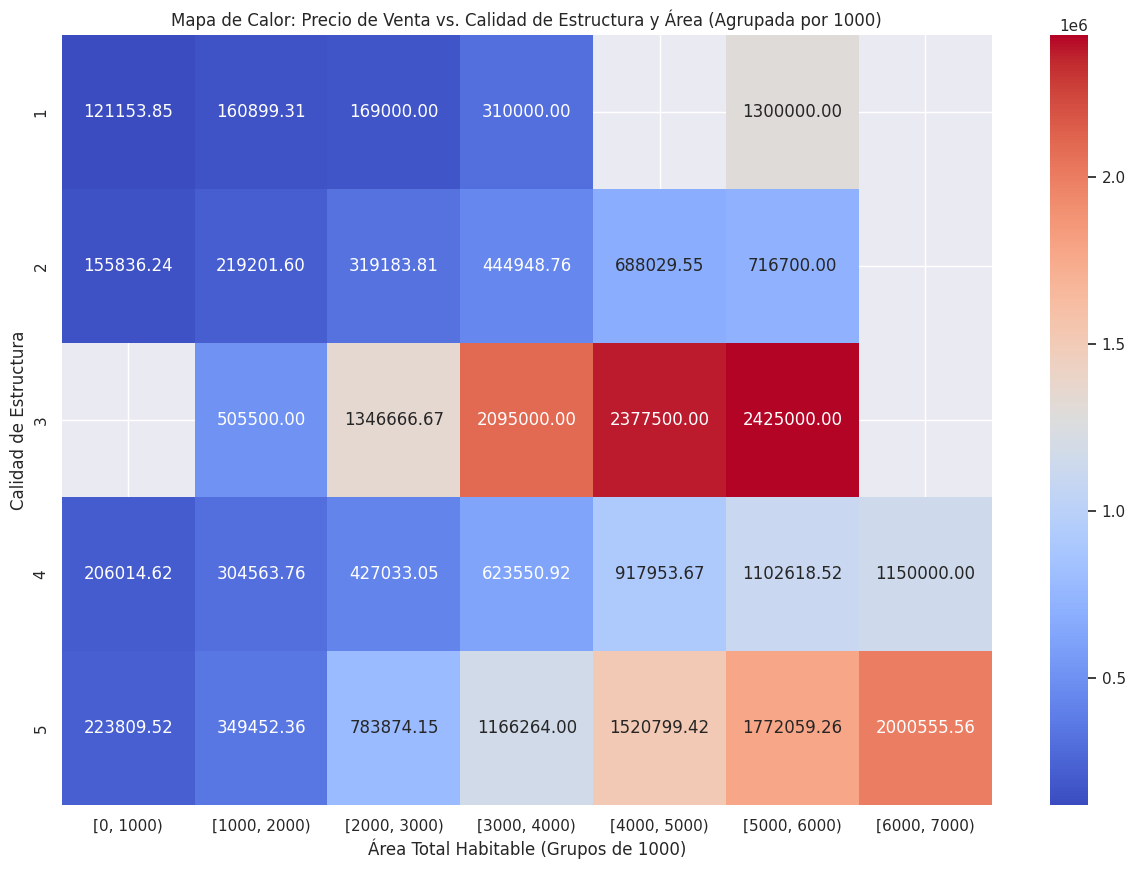

In [ ]:
#REUBICAR
# Discretizar el área total habitable en intervalos de 1000
df['TOT_LVG_AREA_grouped'] = pd.cut(df['TOT_LVG_AREA'], range(0, df['TOT_LVG_AREA'].max() + 1000, 1000), right=False)

# Pivotar los datos con las nuevas categorías
pivot_table = df.pivot_table(index='structure_quality', columns='TOT_LVG_AREA_grouped', values='SALE_PRC', aggfunc='mean')

# Crear el mapa de calor
sns.set(rc={'figure.figsize': (15, 10)})
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')

# Personalizar el gráfico (opcional)
plt.title('Mapa de Calor: Precio de Venta vs. Calidad de Estructura y Área (Agrupada por 1000)')
plt.xlabel('Área Total Habitable (Grupos de 1000)')
plt.ylabel('Calidad de Estructura')

plt.show()

'''
En el mapa de calor encontramos que se da una concentracion de los precios mas altos en la Calidad de Estructura 3, a pesar de que las 4 y 5 se consideren de mayor calidad.

Posibles motivos:
* Es posible que ciertas caracteristicas valoradas por los compradores, como la ubicacion o distancia al mar, esten mas concentradas en las propiedades de calidad 3, lo que compense una menor calidad de construccion.
* Las propiedades de calidad 3 podrian estar ubicadas en zonas con mayor demanda, lo que impulsa precios de ventas en alza.
* Las propiedades de calidad 3 podrian tener caracteristicas adicionales, como piletas, o terrenos mas grandes, que justifiquen un precio mas elevado.
* Las propiedades de calidad 3 podrian haberse vendido en un momento en el que el mercado inmobiliario estaba mas activo o en el que esitian menos opciones de compra en otras categorias.
'''

# Entrenamiento

# **MODELO DE REGRESION**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
8873,25.560733,-80.351997,3660170162200,231500.0,3385,1395,0,8967.4,12606.1,2265.7,94373.1,48091.8,3507.2,5,0,9,4
8865,25.560319,-80.352594,3660170162140,225000.0,4580,1591,3499,8867.5,12620.5,2045.8,94591.0,48272.8,3317.4,24,0,10,4
8862,25.560134,-80.352441,3660170162080,254500.0,3198,2019,0,8945.4,12535.8,2007.4,94632.5,48333.7,3371.2,18,0,8,4
8861,25.560134,-80.352283,3660170162070,230000.0,3721,1395,2741,8990.6,12501.2,2024.3,94602.8,48319.2,3423.3,8,0,7,4
8870,25.560536,-80.353980,3660170161660,210000.0,5548,1327,0,8412.3,12967.8,1712.8,94783.1,48317.8,2851.7,16,0,4,4


In [34]:
df.isna().sum()

,0
LATITUDE,0
LONGITUDE,0
PARCELNO,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
WATER_DIST,0


In [35]:
# prompt: como chequear que todas las variables sean numericas

# Assuming 'df' is your DataFrame
def check_numeric_columns(df, column_names):
    """
    Checks if specified columns in a DataFrame contain only numeric values.

    Args:
        df: The pandas DataFrame.
        column_names: A list of column names to check.

    Returns:
        A dictionary where keys are column names and values are booleans
        indicating if the column is entirely numeric.
        Prints messages indicating which columns are not fully numeric.
    """
    results = {}
    for col in column_names:
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in DataFrame.")
            results[col] = False  # or handle differently, e.g., raise an error
            continue

        is_numeric = pd.api.types.is_numeric_dtype(df[col])
        results[col] = is_numeric
        if not is_numeric:
            print(f"Column '{col}' is not entirely numeric.")
    return results

# Example usage (replace with your actual column names)
numeric_columns_to_check = ['SALE_PRC','LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL',
                           'RAIL_DIST','OCEAN_DIST','WATER_DIST','CNTR_DIST',
                           'SUBCNTR_DI','HWY_DIST','age','month_sold']

check_results = check_numeric_columns(df, numeric_columns_to_check)
check_results

{'SALE_PRC': True,
 'LND_SQFOOT': True,
 'TOT_LVG_AREA': True,
 'SPEC_FEAT_VAL': True,
 'RAIL_DIST': True,
 'OCEAN_DIST': True,
 'WATER_DIST': True,
 'CNTR_DIST': True,
 'SUBCNTR_DI': True,
 'HWY_DIST': True,
 'age': True,
 'month_sold': True}

In [36]:
df.dtypes

,0
LATITUDE,float64
LONGITUDE,float64
PARCELNO,int64
SALE_PRC,float64
LND_SQFOOT,int64
TOT_LVG_AREA,int64
SPEC_FEAT_VAL,int64
RAIL_DIST,float64
OCEAN_DIST,float64
WATER_DIST,float64


In [38]:
''' Dividir dataset en X e y.
X = predecir; variable objetivo. En este caso queremos predecir el precio de venta.
y = variables independientes. En este caso son todas las variables numericas.
'''

X = df.drop(columns=['SALE_PRC'])
y = df['SALE_PRC']

In [39]:
#Dividimos los datos en train (conjuntos de entrenamiento) y test (prueba). En este caso, el tamaño del conjunto de testeo es del 30% de los datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Predicción del Precio de Venta con Random Forest


In [40]:
modelo_regr = RandomForestRegressor(random_state=42, n_estimators=100)

In [41]:
#ajustar modelo - Entrenar modelo
modelo_regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
#predecir conjunto de testeo
y_pred = modelo_regr.predict(X_test)

##Metricas

In [43]:
# @title R² o Coeficiente de determinacion
r2 = r2_score(y_test, y_pred)
r2

0.9169927609054315

*   Valor: 0.92
*   Este valor indica que el modelo explica aproximadamente el 92% de la variabilidad en los precios de venta. Es decir, el modelo es bastante bueno en capturar las relaciones entre las variables predictoras y el precio de venta. Un valor cercano a 1 indica un mejor ajuste del modelo a los datos.

In [51]:
# @title MSE (Mean Squared Error o Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)
mse.round(2)

7784759822.3

In [52]:
# @title RMSE (Root Mean Squared Error o Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)
rmse.round(2)

88231.29

* Valor: 88231.29
* Un RMSE de 88231.29 indica que, en promedio, las predicciones se desvían significativamente de los valores reales. Sin embargo, la interpretacion de este valor depende del contexto especifico del problema.

En terminos practicos significa:

Si los precios de venta promedio son de 200,000, un RMSE de 88231.29 indica un error significativo, ya que las predicciones podrian desviarse en mas del 40% del precio real.

Si los precios de venta promedio son de 1,000,000, el RMSE de 88231.29 prodria considerarse aceptable ya que representa un error promedio de menos del 10%.

In [46]:
# @title MAE (Mean Absolute Error o Error Medio Absoluto)
mae = mean_absolute_error(y_test, y_pred)
mae.round(2)

43918.83

 Un MAE de 43918.83 significa que, en promedio, las predicciones se desvían 43918.83 unidades de los valores reales, en este caso la unidad de los precios es el dólar, esto quiere decir que, en promedio, las predicciones están equivocadas en 43918.83 dólares.

 La interpretacion del MAE depende del contexto del problema y de la escala de los precios de venta, y en este caso, si la variable a predecir es precio de venta, entonces el error en la prediccion del precio de venta es de +- 43918.83 dolares.